In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.image as plting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Código para cargar el Dataset
data= read_csv("TFM_limpio 1.csv")


In [ ]:
data.drop(['ID','Source','Start_Time','End_Time','Description','Street','City','County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1, inplace=True)



In [ ]:
data.columns

In [ ]:
#Código que realiza la división en entrenamiento y test, de acuerdo con la estrategia de evaluación planeada.
Y=data["Severity"]
X=data.drop("Severity",axis=1)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

#hemos dividido el dataset en el porcentaje habitual de datos de entrenamiento (80%) y de test (20%)
#--------------------------------------------REGRESIÓN LINEAL-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
model = LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

#Evaluamos el Modelo con el MSE, el MAE, el RMSE y la MedAE
mse = mean_squared_error(Y_validation,predictions)
mae = mean_absolute_error(Y_validation,predictions)
rmse = np.sqrt(mean_squared_error(Y_validation,predictions))
medae = np.median(np.abs(Y_validation-predictions))

print("----------------------------------------REGRESIÓN LINEAL---------------------------------------")

print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("medae: ",medae)


In [ ]:
#--------------------------------------------RANDOM FOREST CLASSIFIER-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Entrenar el modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Realizar predicciones
predictions = model.predict(X_validation)

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[1, 2, 3, 4])
print(cm)

# Imprimir informe de clasificación
print(classification_report(Y_validation, predictions))
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
#-------------------------------------RANDOM FOREST REGRESSOR-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Crear y entrenar el modelo de Random Forest Regressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)
rmse = np.sqrt(mse)
medae = np.median(np.abs(Y_validation - predictions))

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("MedAE: ", medae)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
#-------------------------------------DECISION TREE CLASSIFIER-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("--------------------------------DECISION TREE CLASSIFIER---------------------------------------")

predictions = model.predict(X_validation)
print(confusion_matrix(Y_validation, predictions))


#Evaluamos el Modelo con el MSE, el MAE, el RMSE y la MedAE
mse = mean_squared_error(Y_validation,predictions)
mae = mean_absolute_error(Y_validation,predictions)
rmse = np.sqrt(mean_squared_error(Y_validation,predictions))
medae = np.median(np.abs(Y_validation-predictions))

print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("medae: ",medae)
print(classification_report(Y_validation, predictions))
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[1, 2, 3, 4])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
#-------------------------------------XGBOOST-----------------------------------------------------
#-------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir etiquetas a rango [0, n_classes-1]
Y = Y - 1

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Definir pesos manuales para las clases
class_weights = {
    0: 1,    # Peso para severidad 1
    1: 0.11,    # Peso para severidad 2 (reducido)
    2: 1,    # Peso para severidad 3
    3: 1     # Peso para severidad 4
}

# Imprimir pesos de las clases
print("Class Weights:")
print(class_weights)

# Entrenar el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, Y_train)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[0, 1, 2, 3])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


In [ ]:
#-------------------------------------XGBOOST CON AUTOBALANCEO------------------------------------
#-------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Calcular pesos de clase inversamente proporcionales a su frecuencia
class_counts = np.bincount(Y_train)
class_weights = {i: len(Y_train) / class_counts[i] for i in range(len(class_counts))}

# Imprimir pesos de las clases
print("Class Weights:")
print(class_weights)

# Crear un array de pesos para cada muestra en el conjunto de entrenamiento
sample_weights = np.array([class_weights[class_label] for class_label in Y_train])

# Entrenar el modelo XGBoost con pesos de muestra
model = XGBClassifier()
model.fit(X_train, Y_train, sample_weight=sample_weights)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[0, 1, 2, 3])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


In [ ]:
#-------------------------------------XGBOOST CON SMOTE------------------------------------
#------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_resampled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir pesos manualmente
class_weights_manual = {
    0: 8.0,   # Peso para severidad 1
    1: 0.5,    # Peso para severidad 2 (reducido)
    2: 3.0,    # Peso para severidad 3
    3: 6.0     # Peso para severidad 4
}
print("Pesos de las clases manuales:", class_weights_manual)

# Convertir los pesos de clase a un formato adecuado para `sample_weight`
sample_weights = [class_weights_manual[cls] for cls in y_train]

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo con los pesos de las clases
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 1 a 4
severity_mapping = {'Severity': {1: 1, 2: 2, 3: 3, 4: 4}}
df.replace(severity_mapping, inplace=True)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes y año
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)','Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()  # Hacemos una copia

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Inicializar y entrenar el clasificador (usando RandomForest como ejemplo)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = clf.predict(X_test)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Severity'] = predictions  

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")

In [ ]:
#-------------------------------------DECISION TREE CON FILTRO----------------------------
#-----------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


Mejores parámetros encontrados por GridSearchCV:
{'max_depth': 20, 'n_estimators': 200}
Modelo: RandomForestRegressor
Mean Squared Error: 24.172556242943173
R^2 Score: 0.19222900464331238


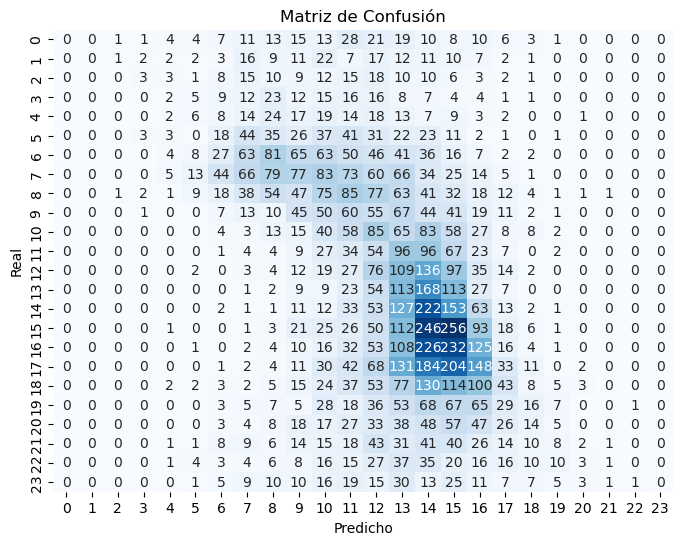

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Carga de datos
df = pd.read_csv('predicted_severity_aug2022_jan2023.csv')

# Paso 2: Preprocesamiento de datos
# Asegúrate de que no hay valores nulos
df = df.dropna()

# Codificación de variables categóricas con LabelEncoder
label_encoders = {}
categorical_columns = ['State']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Paso 3: Preparación de datos
X = df.drop(columns=['Hour'])
y = df['Hour']

# Paso 4: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Paso 6: Predicción con el mejor modelo ajustado
y_pred = best_model.predict(X_test)

# Paso 7: Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Modelo: {best_model.__class__.__name__}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Paso 8: Añadir las predicciones al dataframe original
df['Predicted_Hour'] = best_model.predict(X)

# Paso 9: Revertir la codificación de las variables categóricas
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

# Paso 10: Guardar el dataframe con las predicciones
df.to_csv('dataset_con_predicciones.csv', index=False)

# Paso 11: Mostrar la matriz de confusión como un heatmap (adaptado para regresión)
# Convertimos las predicciones y valores reales a enteros para la matriz de confusión
y_pred_int = np.round(y_pred).astype(int)
y_test_int = y_test.astype(int)
cm = confusion_matrix(y_test_int, y_pred_int)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [31]:
import pandas as pd

# Cargar el dataframe con las predicciones
df = pd.read_csv('dataset_con_predicciones.csv')

# Redondear los valores de la columna Predicted_Hour y convertir a enteros
df['Predicted_Hour'] = df['Predicted_Hour'].round().astype(int)

# Cambiar el nombre de la columna Predicted_Severity a Severity
df.rename(columns={'Predicted_Severity': 'Severity'}, inplace=True)

# Guardar el dataframe actualizado
df.to_csv('dataset_con_predicciones_redondeado.csv', index=False)


In [32]:
import pandas as pd

# Cargar el dataset desde el archivo CSV
df = pd.read_csv("dataset_con_predicciones_redondeado.csv")

# Filtrar por cada nivel de severidad y contar los casos por estado, mes y año
severity_1 = df[df['Severity'] == 1].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 1')
severity_2 = df[df['Severity'] == 2].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 2')
severity_3 = df[df['Severity'] == 3].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 3')
severity_4 = df[df['Severity'] == 4].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 4')

# Fusionar los recuentos en un solo DataFrame
result_df = severity_1.merge(severity_2, on=['State', 'Month', 'Year'], how='outer') \
                    .merge(severity_3, on=['State', 'Month', 'Year'], how='outer') \
                    .merge(severity_4, on=['State', 'Month', 'Year'], how='outer')

# Llenar valores NaN con 0
result_df = result_df.fillna(0)

result_df['Severity 1']=result_df['Severity 1'].astype(int)
result_df['Severity 2']=result_df['Severity 2'].astype(int)
result_df['Severity 3']=result_df['Severity 3'].astype(int)
result_df['Severity 4']=result_df['Severity 4'].astype(int)

# Calcular el total
result_df['Total'] = result_df['Severity 1'] + result_df['Severity 2'] + result_df['Severity 3'] + result_df['Severity 4']

# Reordenar las columnas
columnas_reordenadas = ['State', 'Month', 'Year', 'Severity 1', 'Severity 2', 'Severity 3', 'Severity 4', 'Total']
result_df = result_df[columnas_reordenadas]

print(result_df)
result_df.to_csv("accidentes_por_estado.csv",index=False)

    State  Month  Year  Severity 1  Severity 2  Severity 3  Severity 4  Total
0      AL      1  2023           0          53           0           3     56
1      AL      8  2022           0          64          62           2    128
2      AL      9  2022           0          44          12           0     56
3      AL     10  2022           0          37           0           0     37
4      AL     11  2022           0          48           0           3     51
..    ...    ...   ...         ...         ...         ...         ...    ...
269    WY     12  2022           0          20           0           0     20
270    KY      9  2022           0           0           7           0      7
271    ME      8  2022           0           0           1           0      1
272    ME      9  2022           0           0           1           0      1
273    NE      1  2023           0           0           0           3      3

[274 rows x 8 columns]


In [33]:
df = pd.read_csv("dataset_con_predicciones_redondeado.csv")
df

,State,Hour,Day,Month,Year,Wind_Speed(km/h),Temperature(C),Precipitation(mm),Severity,Predicted_Hour
0,VA,23,3,12,2022,8.04,7.22,0.00,2,18
1,CA,13,20,8,2022,20.92,20.00,0.00,2,14
2,TX,13,12,10,2022,11.26,32.78,0.00,2,14
3,KS,18,10,8,2022,11.26,30.00,0.00,2,16
4,LA,20,10,11,2022,8.04,17.22,0.00,2,17
...,...,...,...,...,...,...,...,...,...,...
52399,CA,18,28,1,2023,0.00,13.89,0.00,2,15
52400,NY,18,13,10,2022,25.74,19.44,2.03,2,15
52401,CA,13,22,12,2022,4.83,20.00,0.00,2,14
52402,OH,15,12,11,2022,11.26,1.11,0.00,2,15


In [34]:
import pandas as pd

# Calcular la diferencia absoluta entre Predicted_Hour y Hour
df['Difference'] = (df['Predicted_Hour'] - df['Hour']).abs()

# Calcular el desfase medio
mean_desfase = df['Difference'].mean()

# Convertir el desfase medio en horas, minutos y segundos
hours = int(mean_desfase)
minutes = int((mean_desfase - hours) * 60)
seconds = int(((mean_desfase - hours) * 60 - minutes) * 60)

print(f"El desfase medio es: {hours} horas, {minutes} minutos, y {seconds} segundos")

El desfase medio es: 2 horas, 17 minutos, y 13 segundos


Accuracy: 0.865143882146401
Confusion Matrix:
[[  336   211   177     3]
 [  568 44711   922  3358]
 [  265   266   188     3]
 [    6  1273    15   102]]


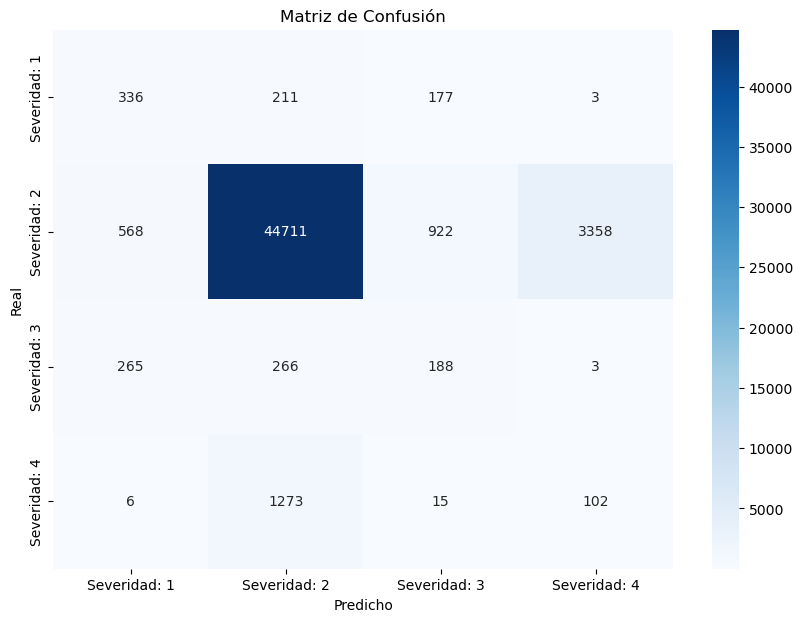

In [1]:
#-------------------------------------DECISION TREE CON FILTRO----------------------------
#-----------------------------------------------------------------------------------------


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9466834592779177
Confusion Matrix:
[[    0   381   346     0]
 [    0 49220   338     1]
 [    0   332   390     0]
 [    0  1396     0     0]]


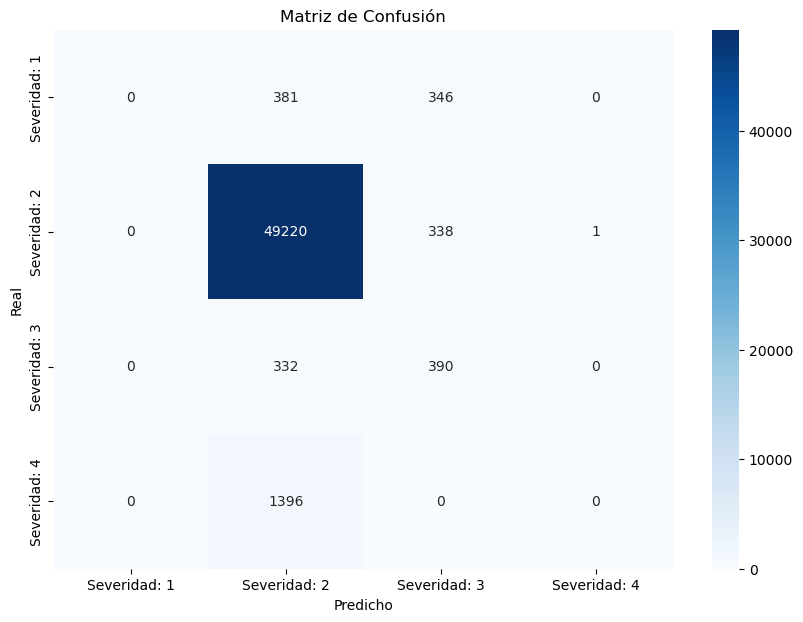

In [2]:
#-------------------------------------FILTRO XGBOOST SIN SMOTE---------------------
#----------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9182314327150599
Confusion Matrix:
[[    0    36   690     1]
 [    0 47411   617  1531]
 [    0   108   614     0]
 [    0  1302     0    94]]


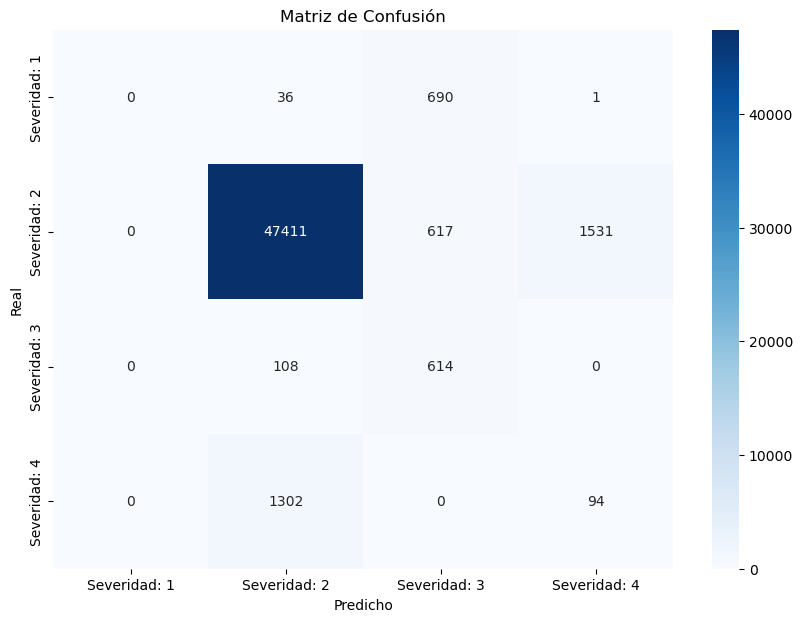

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,d
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9238798564995039
Confusion Matrix:
[[    9   428   289     1]
 [   66 48066   347  1080]
 [    7   432   281     2]
 [    2  1331     4    59]]


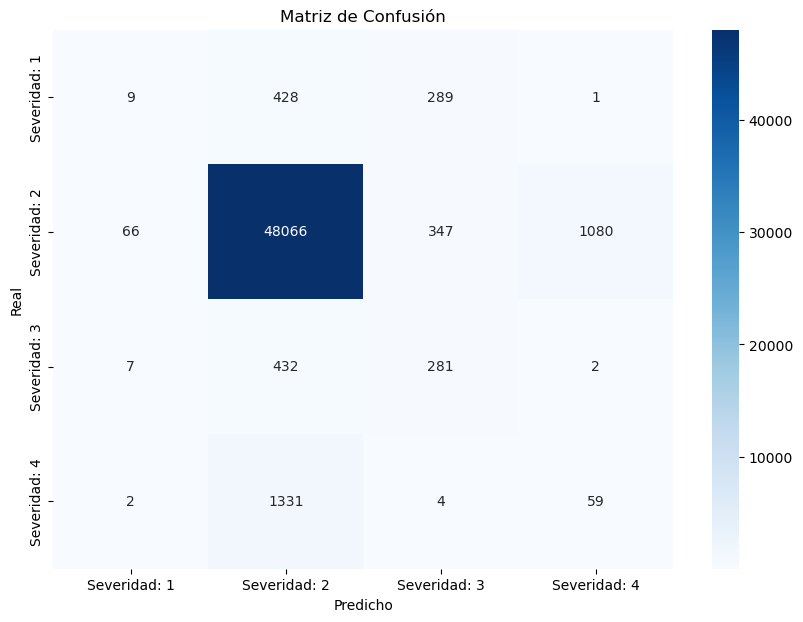

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador RandomForest
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")
